In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [7]:
data = pd.read_csv("Pokemon.csv")
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [8]:
print(len(data.isnull().any()))

13


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
data.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [11]:
data['Type 2'].replace(np.nan,"0",inplace=True)
data.isnull().any()

#             False
Name          False
Type 1        False
Type 2        False
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [12]:
data['Type 2'].head(10)

0    Poison
1    Poison
2    Poison
3    Poison
4         0
5         0
6    Flying
7    Dragon
8    Flying
9         0
Name: Type 2, dtype: object

In [15]:
#Unique pokemons count

print("Number of pokemons are : ", str(data['Name'].nunique()))

Number of pokemons are :  800


In [16]:
pd.DataFrame(data['Name'].unique().tolist(), columns=['Pokemon'])

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,VenusaurMega Venusaur
4,Charmander
...,...
795,Diancie
796,DiancieMega Diancie
797,HoopaHoopa Confined
798,HoopaHoopa Unbound


In [17]:
npoke_total = data.copy()
npoke_total.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [18]:
npoke_total = pd.concat([npoke_total['Name'], data['Total']],axis=1)
npoke_total

,Name,Total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,VenusaurMega Venusaur,625
4,Charmander,309
...,...,...
795,Diancie,600
796,DiancieMega Diancie,700
797,HoopaHoopa Confined,600
798,HoopaHoopa Unbound,680


In [23]:
data[data['Name'] == 'Diancie']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True


Big plot

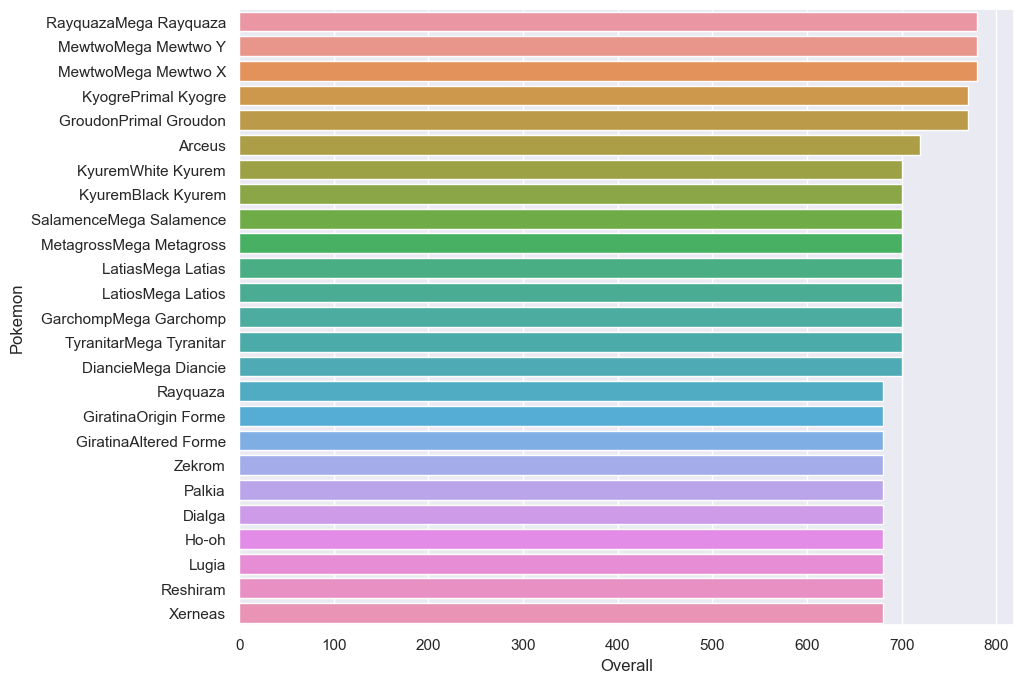

In [25]:
sns.set()
plt.figure(figsize = (10,8))
ax = sns.barplot(x='Total', y= 'Name',data=npoke_total.sort_values(by='Total',ascending=False).head(25))
ax.set(xlabel='Overall',ylabel='Pokemon')
plt.show()

# Networkx Analysis

In [30]:
g = nx.Graph()
g = nx.from_pandas_edgelist(data, source='Name',target='Type 1', edge_attr=True)
print(g)

Graph with 818 nodes and 800 edges


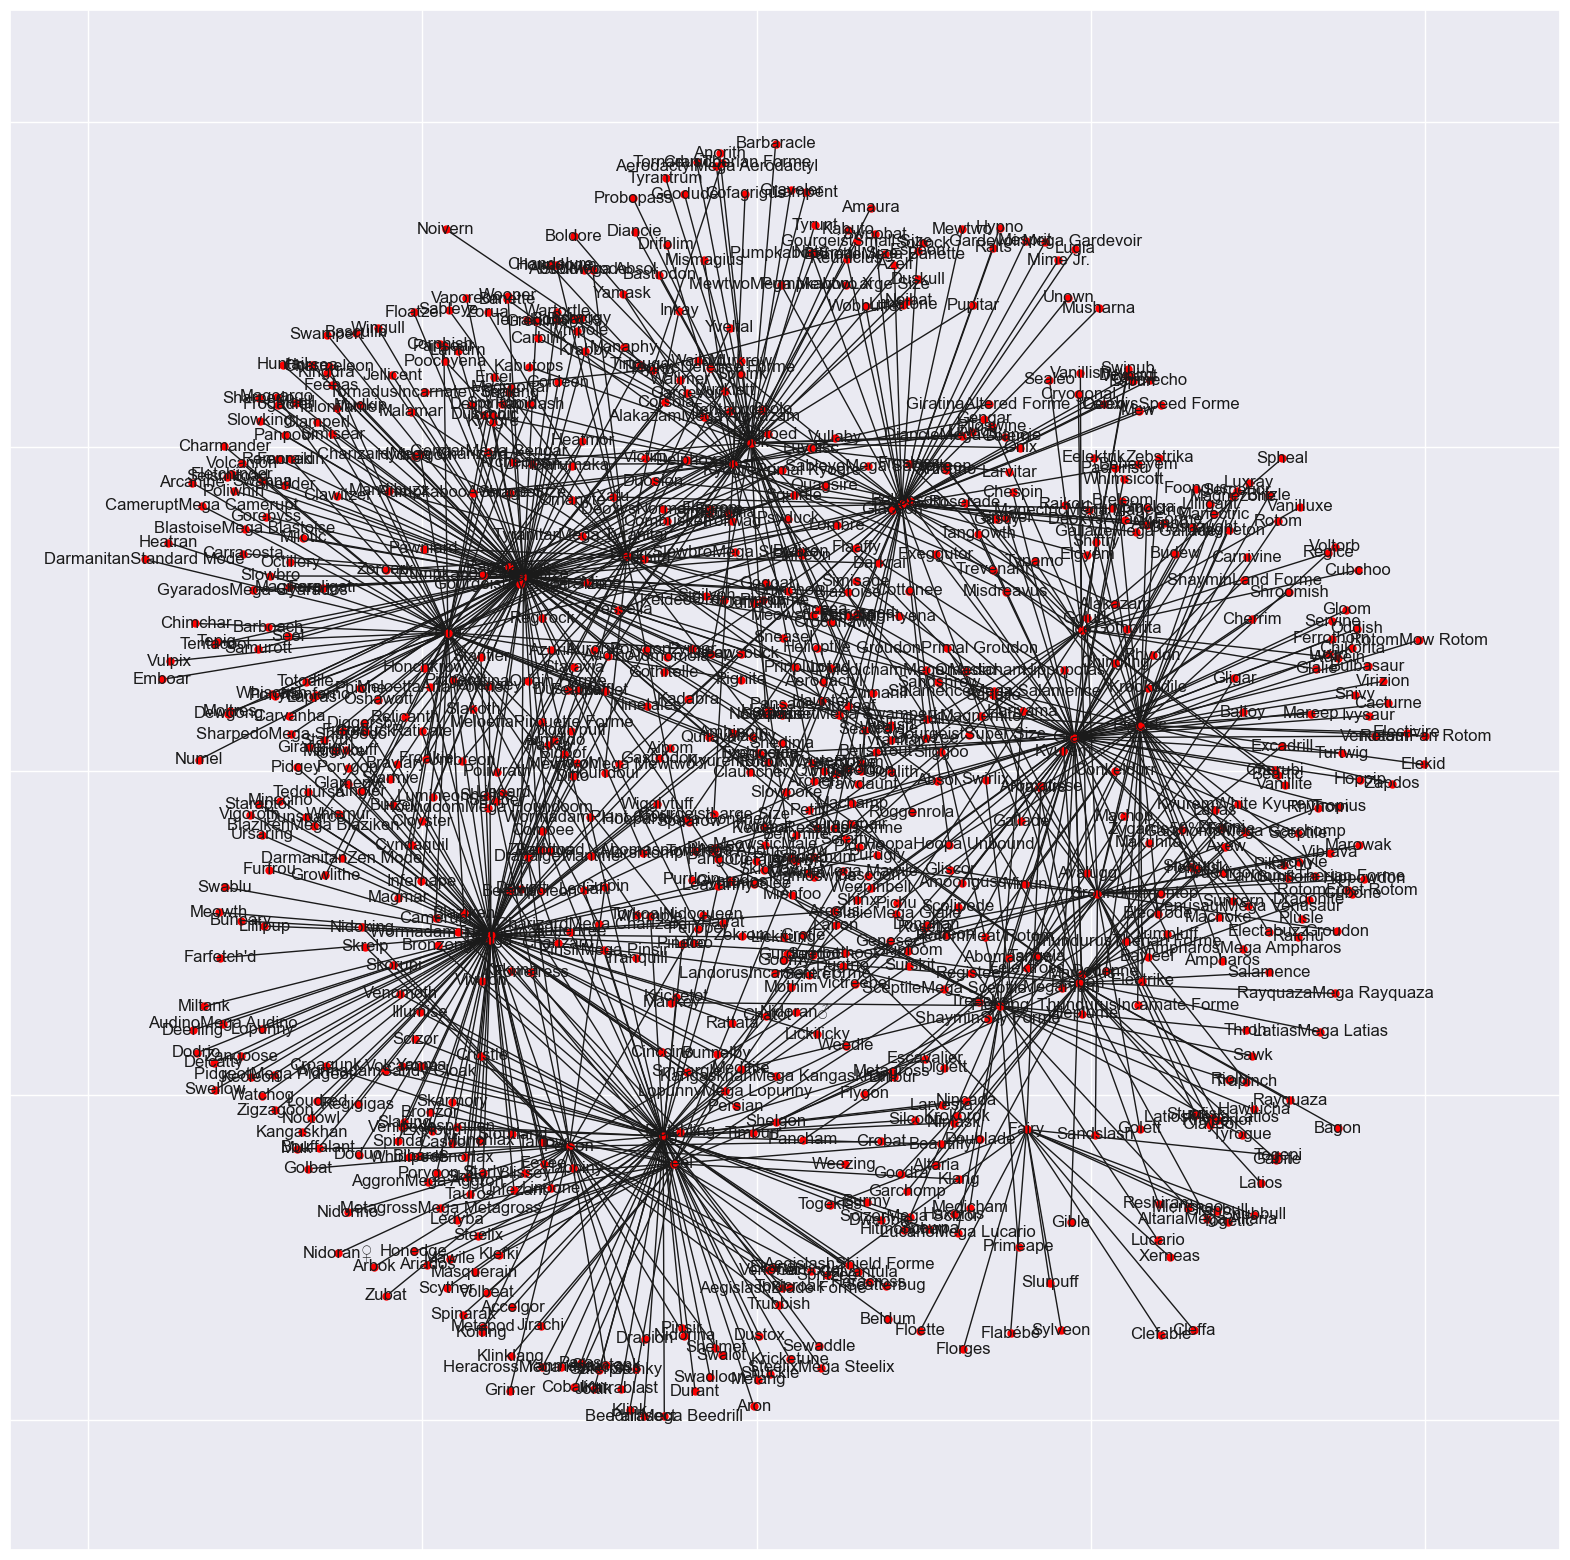

In [44]:
plt.figure(figsize=(20,20))
pos=nx.spring_layout(g, k= .20)
nx.draw_networkx(g,pos,node_size=25,node_color='red')
plt.show()


In [46]:
# data for generation type 1: Types of Pokemon

gen1 = data[data['Generation'] == 1]
gen1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
162,150,Mewtwo,Psychic,0,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,0,780,106,150,70,194,120,140,1,True


In [55]:
types = gen1['Type 1']
explode = np.arange(len(types.unique()))*0.01
explode

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14])

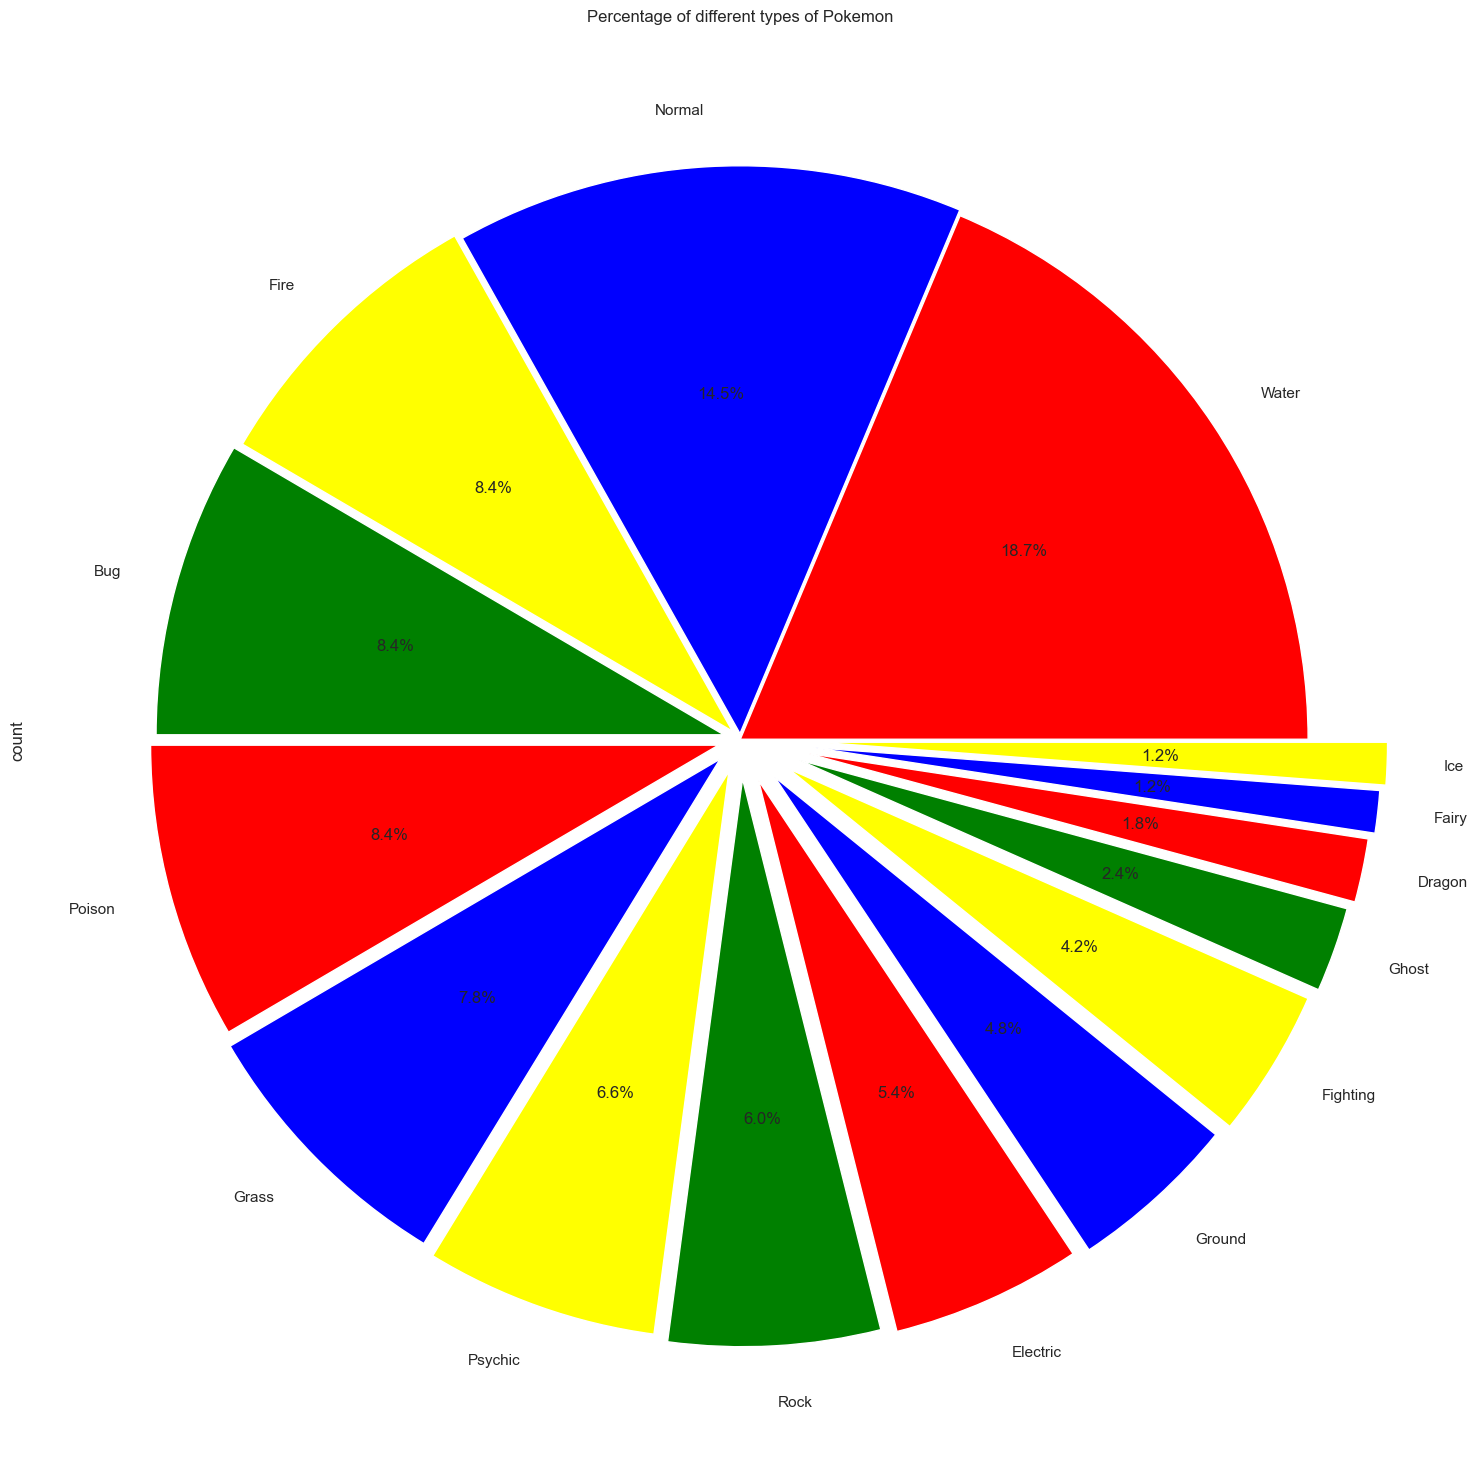

In [64]:
colors = ['red','blue','yellow','green']
types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title = 'Percentage of different types of Pokemon',
    autopct = '%1.1f%%',
    shadow=False,
    figsize=(15,20))

plt.tight_layout()
plt.show()

In [67]:
legendary_gen1 = gen1.groupby('Legendary').size()

legendary_gen1

Legendary
False    160
True       6
dtype: int64

In [68]:
# Percentage of legendary to non legendary

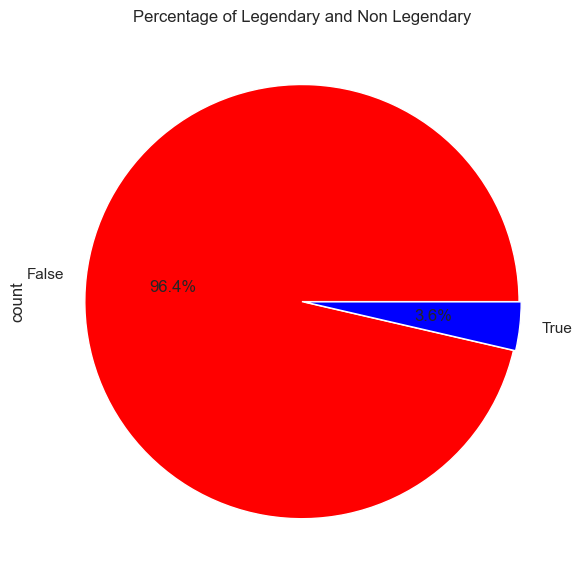

In [71]:
types = gen1['Legendary']
explode = np.arange(len(types.unique())) * 0.01
colors = ['red',
         'blue']
types.value_counts().plot.pie(
    explode = explode,
    colors = colors,
    title='Percentage of Legendary and Non Legendary',
    autopct = '%1.1f%%',
    figsize=(6,6))

plt.tight_layout()
plt.show()
    
    

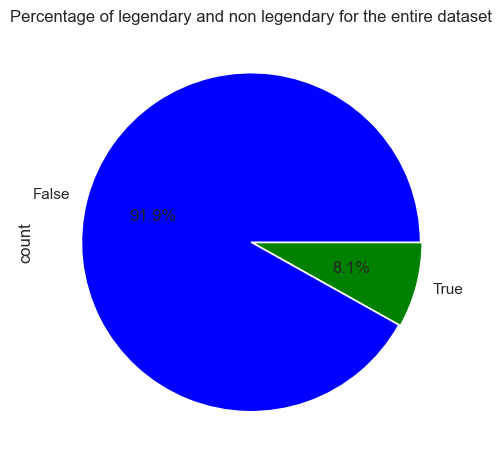

In [74]:
#For the entire generation

types = data['Legendary']
explode = np.arange(len(types.unique()))*0.01
colors = ['blue',
          'green']
types.value_counts().plot.pie(
    explode = explode,
    colors = colors,
    title = 'Percentage of legendary and non legendary for the entire dataset',
    autopct = '%1.1f%%'
)

plt.tight_layout()
plt.show()

In [75]:
gen1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
162,150,Mewtwo,Psychic,0,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,0,780,106,150,70,194,120,140,1,True


In [78]:
g = nx.from_pandas_edgelist(gen1, source='Name', target = 'Type 1',edge_attr=True)
print(g)


Graph with 181 nodes and 166 edges


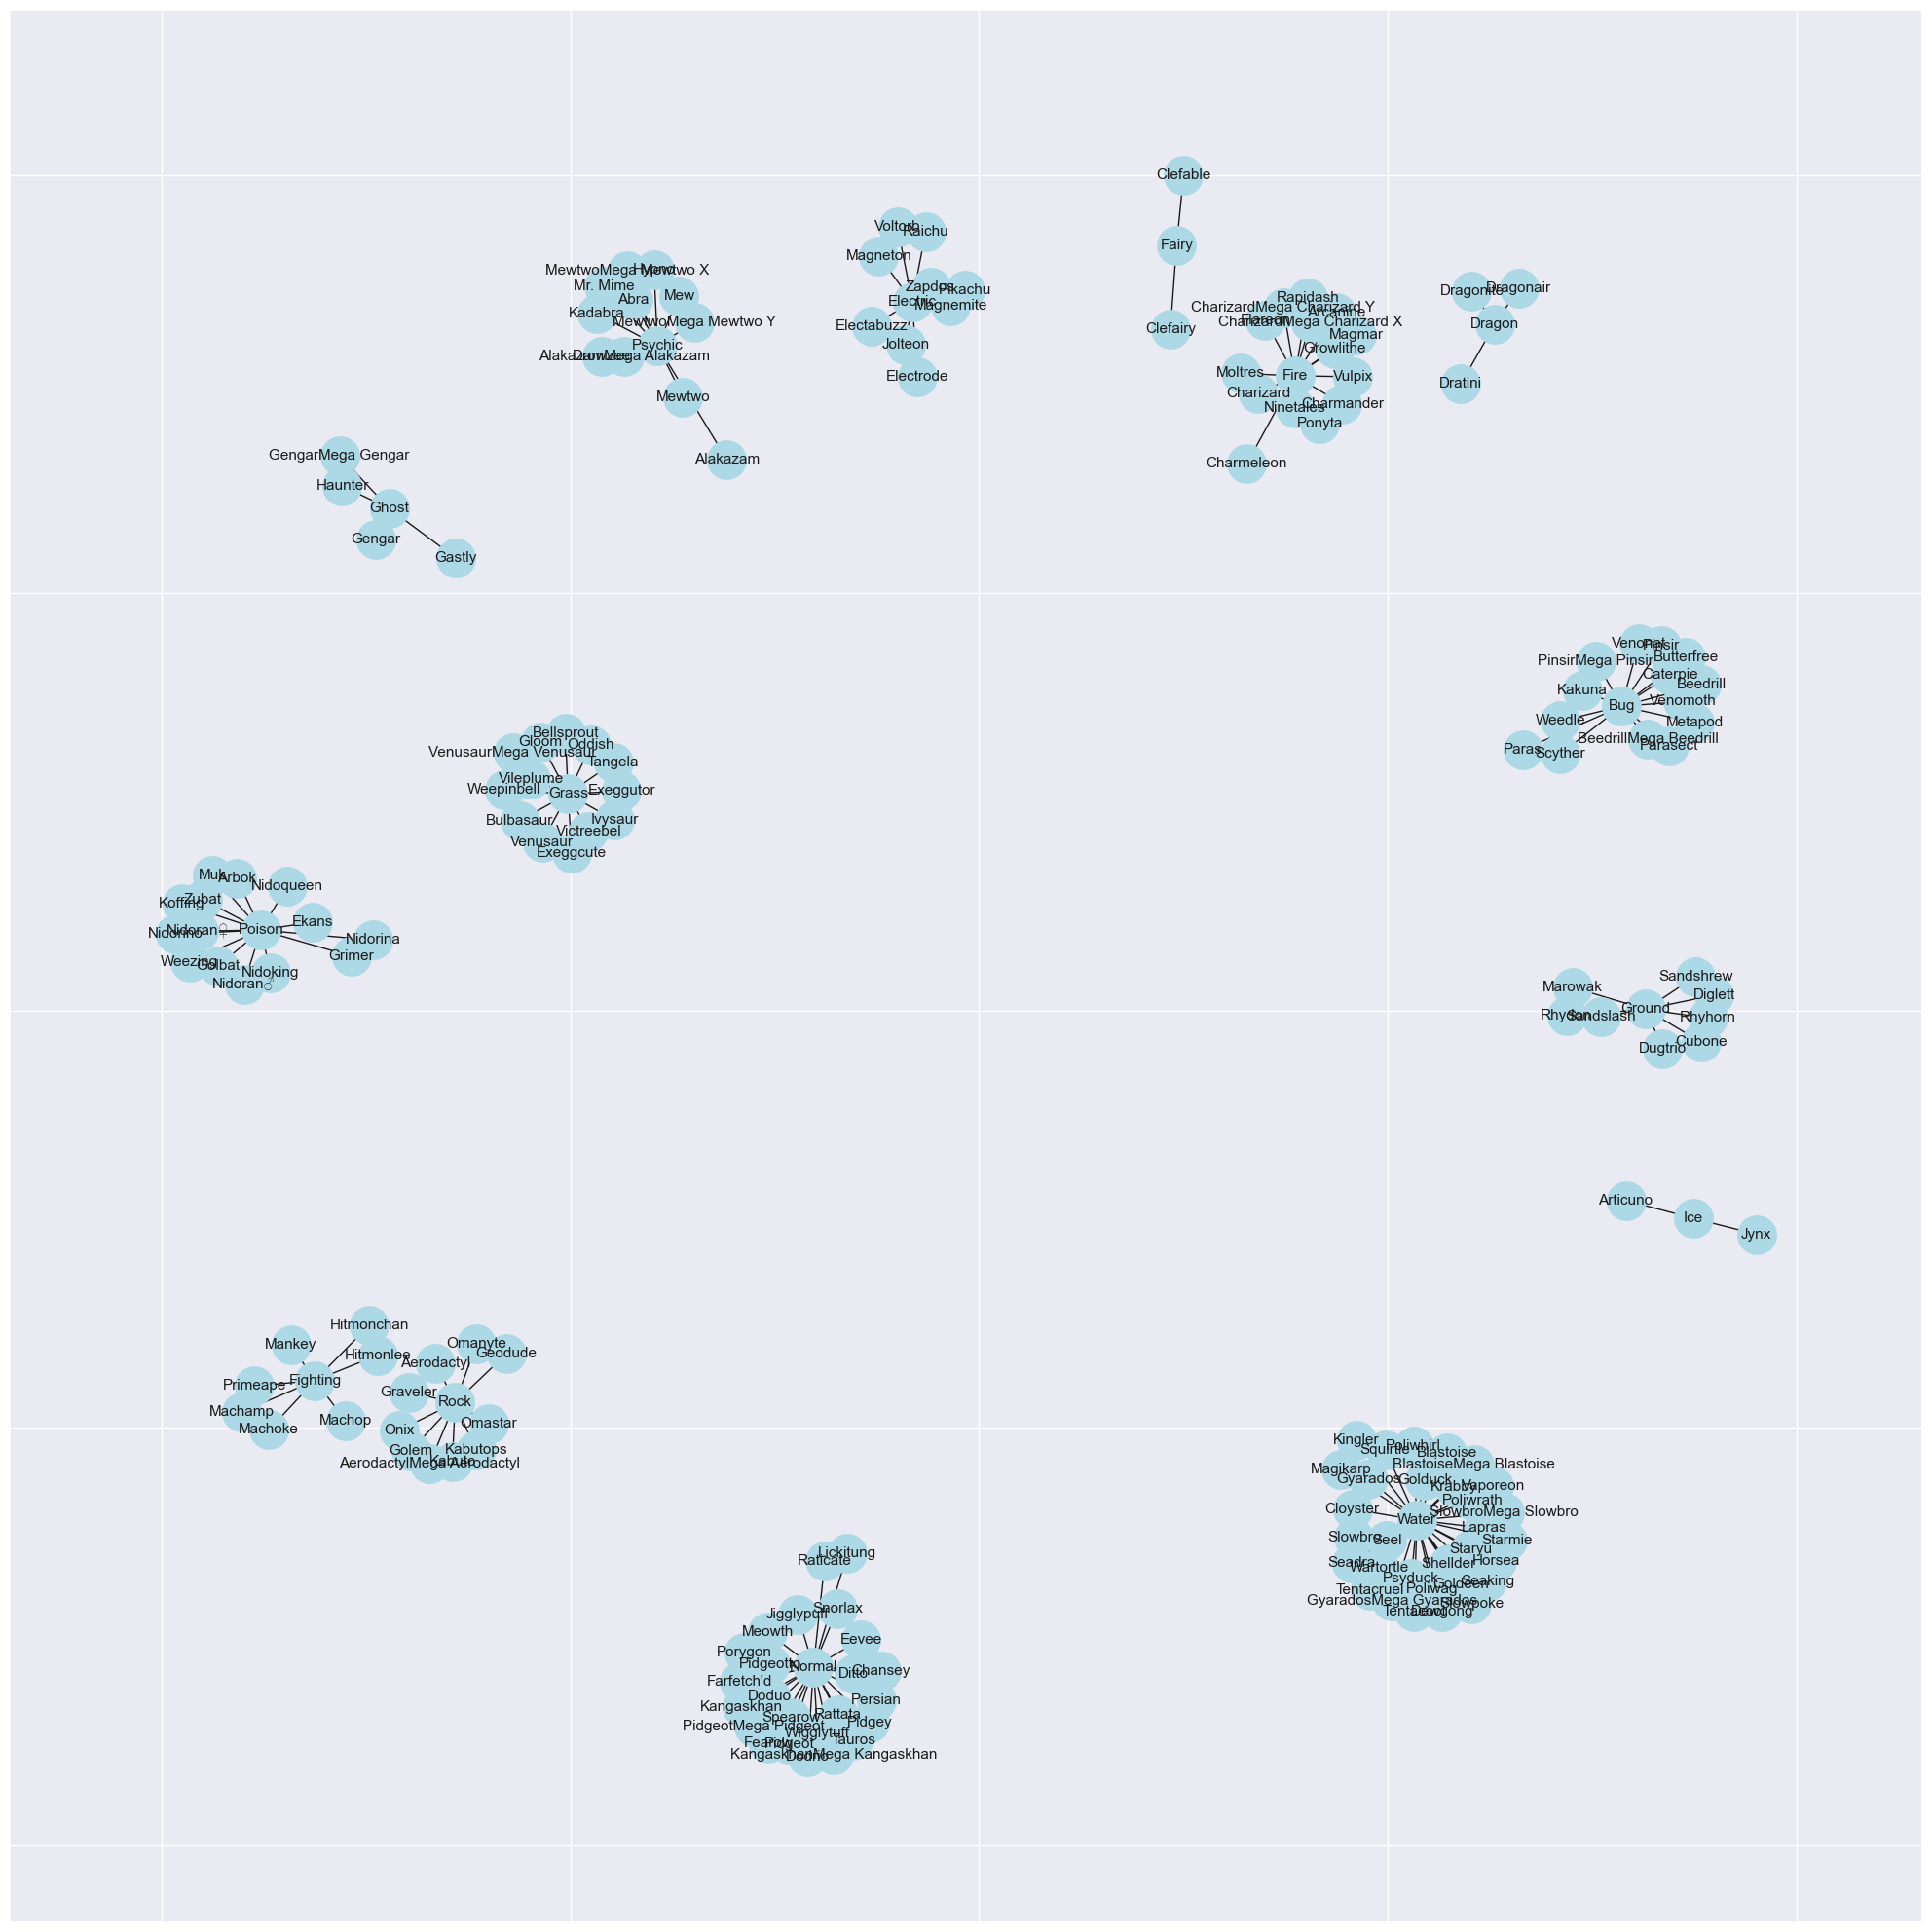

In [92]:
plt.figure(figsize = (20,20))
pos = nx.spring_layout(g , k = 0.10)
nx.draw_networkx(g, pos, node_size=805,node_color='lightblue',font_size=11)
plt.tight_layout()
plt.show()

In [93]:
# i love char
from IPython.display import Image
Image(url='http://img08.deviantart.net/fb0c/i/2013/082/7/5/004_charmander_by_pklucario-d5z1g9v.png')